<a href="https://colab.research.google.com/github/Weverton-Vitor/qualifact-course/blob/main/experiment_74_easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

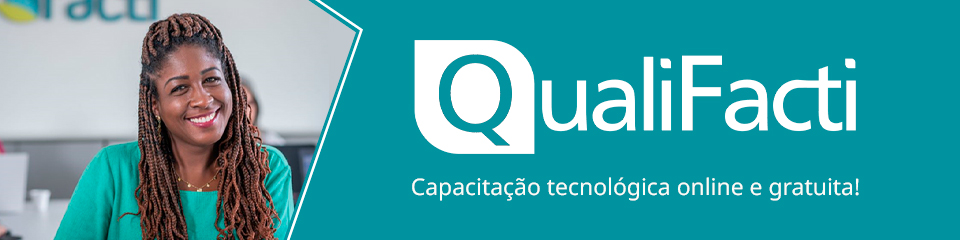

# **Inteligência Artificial aplicada à Visão Computacional**

**Capítulo 8: Visão Computacional aplicada ao reconhecimento de texto com OCR**



<p align="justify">

Todos os direitos reservados à Facti, 2024
<p>

[www.qualifacti.com.br](https://)

---

<p align="justify">
É importante esclarecer que estas atividades não compõem a avaliação e não haverá correção formal por parte dos instrutores; o objetivo é a autoaprendizagem e prática.
<p>

---

# **ETAPA CONCEITUALIZAR**

---

# **Recado importante**


Olá,
<p align="justify">
Como parte do capítulo de <b>reconhecimento de texto</b>, gostaríamos de ressaltar a importância de realizar as atividades de implementação fornecidas. Estas atividades são cuidadosamente desenhadas para reforçar o conteúdo apresentado.
Lembre-se, a implementação é uma habilidade que se aprimora com a prática. Ao aplicar os conceitos aprendidos, especialmente por meio da escrita e execução de códigos, você ganhará uma compreensão mais profunda e prática dos modelos.
Encorajamos todos a dedicar tempo a essas atividades. Ao fazer isso, você não apenas reforçará o que foi ensinado, mas também desenvolverá as habilidades essenciais de resolução de problemas e depuração de código.

Lembrem-se: não basta apenas aprender, é preciso codificar! O caminho para dominar os modelos começa com a experiência prática.

Atenciosamente,

Júlio e Marcelo
<p>

---

# **Atividade de experimentação 74**

Reconhecimento de texto com EasyOCR

## Instalação e importação das bibliotecas


In [ ]:
# Instalação da biblioteca EasyOCR
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.3 MB/s eta 0:00:00


In [ ]:
# Código necessário após atualização do opencv-python-headless no Colab para a versão 4.5.5.62, que não suporta o "_registerMatType".
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.9.0.80
Uninstalling opencv-python-headless-4.9.0.80:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless-4.9.0.80.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libavcodec-512f0acb.so.59.37.100
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libavformat-3ff1be5b.so.59.27.100
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libavutil-a0a0531e.so.57.28.100
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libcrypto-0c9efecc.so.1.1
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.10/dist-packages/opencv_python_headless.libs/libpng16-7379b3c3.so.16.40.0
    /usr/local/lib/p

In [ ]:
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 14.3 MB/s eta 0:00:00


In [ ]:
# Importação das bibliotecas necessárias
import cv2
from easyocr import Reader
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import zipfile

## Configuração de idioma

In [ ]:
# Configuração dos idiomas para o OCR
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')
print(idiomas)

['en', 'pt']


In [ ]:
# Definição da utilização da GPU
gpu = True #@param {type: 'boolean'}

## Conectando com o Drive e acessando os arquivos

In [ ]:
# Conectando o Colab ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Realize o dowload da pasta Material_complementar_reconhecimento_voz.zip do Google Sala de Aula e transfira-a para o seu Google Drive
# Localize o caminho da pasta no menu Arquivos, no menu lateral esquerdo
path = "/content/drive/MyDrive/Material_complementar_reconhecimento_texto.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")

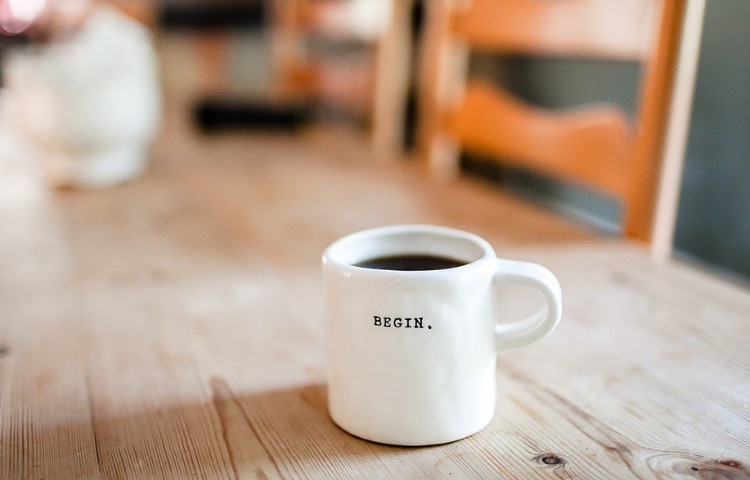

In [ ]:
# Carregamento e exibição da imagem a ser processada
img = cv2.imread('/content/imagens/caneca.jpg')
cv2_imshow(img)
original = img.copy()

## Reconhecimento (OCR)

In [ ]:
# Inicialização do EasyOCR com os idiomas especificados e realização do OCR
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
resultados

[([[373, 313], [435, 313], [435, 331], [373, 331]],
  'BEGIN .',
  0.6015328013699431)]

## Escrevendo os resultados na imagem

**Texto**

In [ ]:
# Estabelece a fonte do texto
fonte = '/content/fontes/calibri.ttf'

In [ ]:
# Função para escrever texto na imagem
def escreve_texto(texto, x, y, img, fonte, cor=(50,50,255), tamanho = 22):
  fonte = ImageFont.truetype(fonte, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)
  return img

## Caixa delimitadora

Cantos da bounding box:
* **te** = topo esquerdo (superior esquerdo)
* **td** = topo direito (superior direito)
* **bd** = baixo direito (inferior direito)
* **be** = baixo esquerdo (inferior esquerdo)

In [ ]:
# Função para obter coordenadas da caixa delimitadora
def coordenada_caixa(caixa):
  (te, td, bd, be) = caixa
  te = (int(te[0]), int(te[1]))
  td = (int(td[0]), int(td[1]))
  bd = (int(bd[0]), int(bd[1]))
  be = (int(be[0]), int(be[1]))
  return te, td, bd, be

In [ ]:
# Função para desenhar caixa delimitadora na imagem
def desenha_caixa(img, te, bd, cor_caixa=(200,255,0), espessura=2):
  cv2.rectangle(img, te, bd, cor_caixa, espessura)
  return img

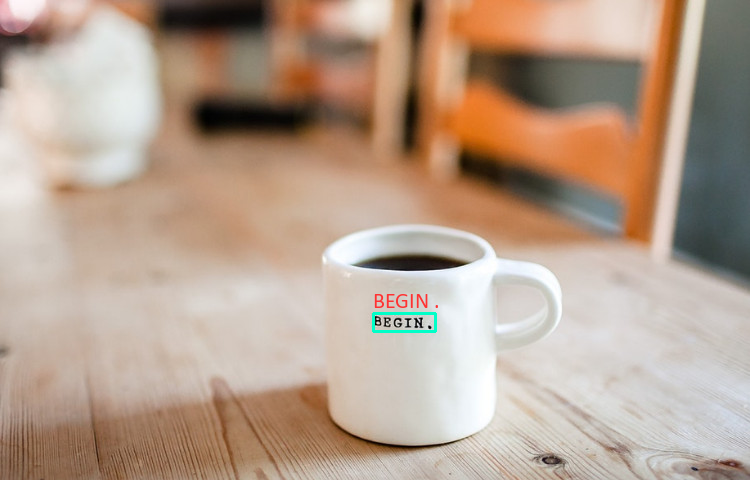

In [ ]:
# Aplicação das funções para desenhar caixas delimitadoras e escrever texto na imagem
img = original.copy()
for (caixa, texto, probabilidade) in resultados:
  #print(caixa, texto, probabilidade)
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

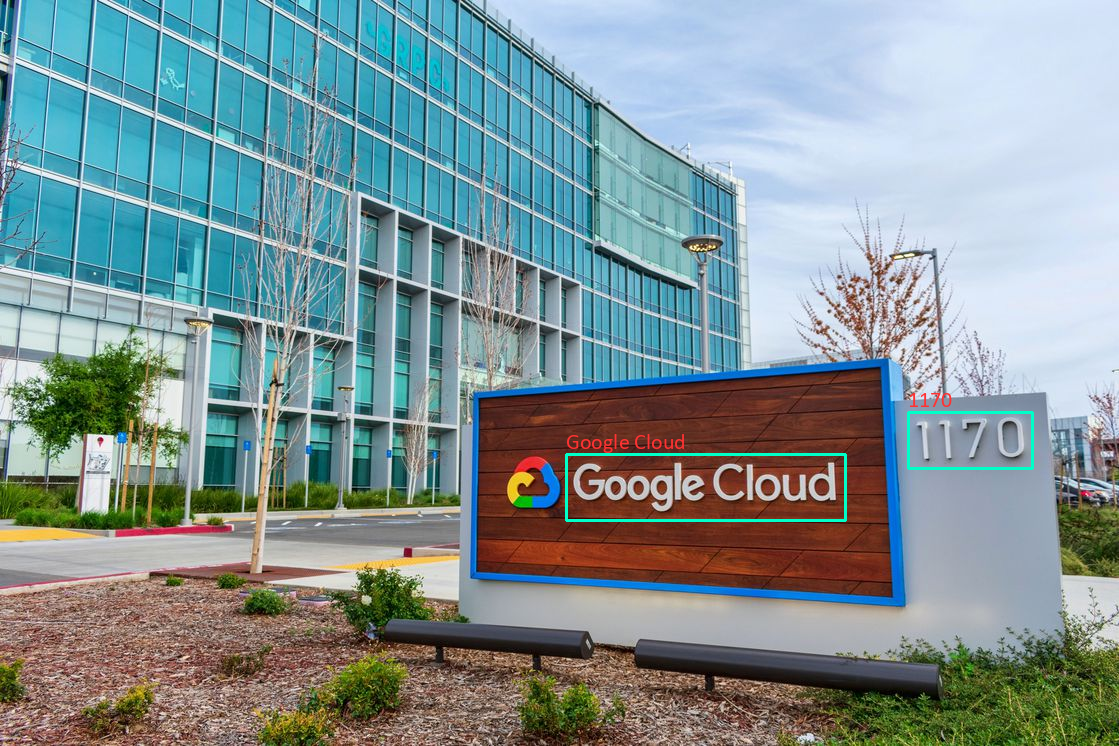

In [ ]:
# Processamento de outra imagem com EasyOCR
img = cv2.imread('/content/imagens/google-cloud.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

## Outros idiomas

Paras saber outros idiomas disponíveis [veja aqui](https://www.jaided.ai/easyocr/).

In [ ]:
# Teste do EasyOCR com idioma francês
lista_idiomas = 'en,fr'
idiomas = lista_idiomas.split(',')
idiomas

['en', 'fr']

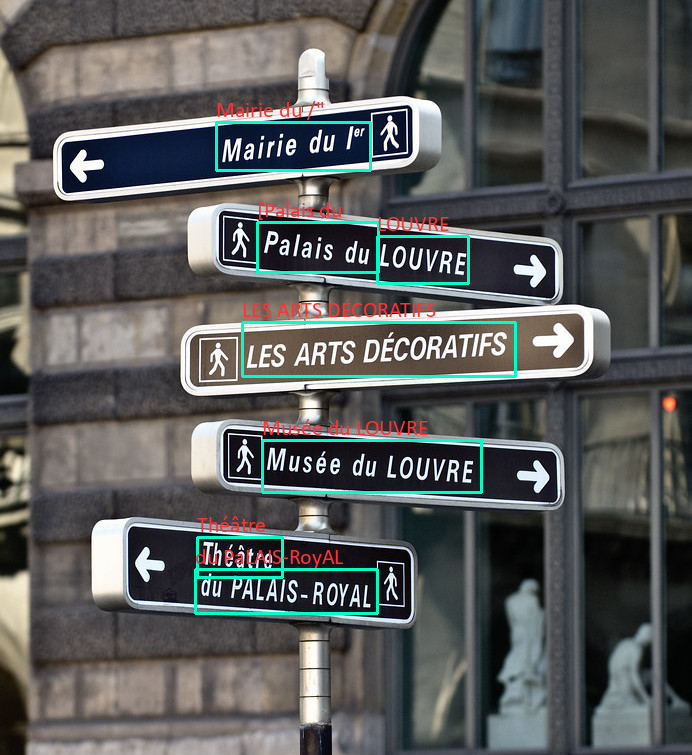

In [ ]:
# Processamento de outra imagem com EasyOCR
img = cv2.imread('/content/imagens/frances.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

## Texto com fundo

In [ ]:
# Função para adicionar fundo ao texto na imagem
def fundo_texto(texto, x, y, img, fonte, tamanho=32, cor_fundo=(200,255,0)):
  fundo = np.full((img.shape), (0,0,0), dtype=np.uint8)
  texto_fundo = escreve_texto(texto, x, y, fundo, fonte, tamanho=tamanho)
  texto_fundo = cv2.dilate(texto_fundo,(np.ones((3,5),np.uint8)))
  fx,fy,fw,fh = cv2.boundingRect(texto_fundo[:,:,2])
  cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), cor_fundo, -1)
  return img

In [ ]:
fonte = '/content/fontes/calibri.ttf'
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')

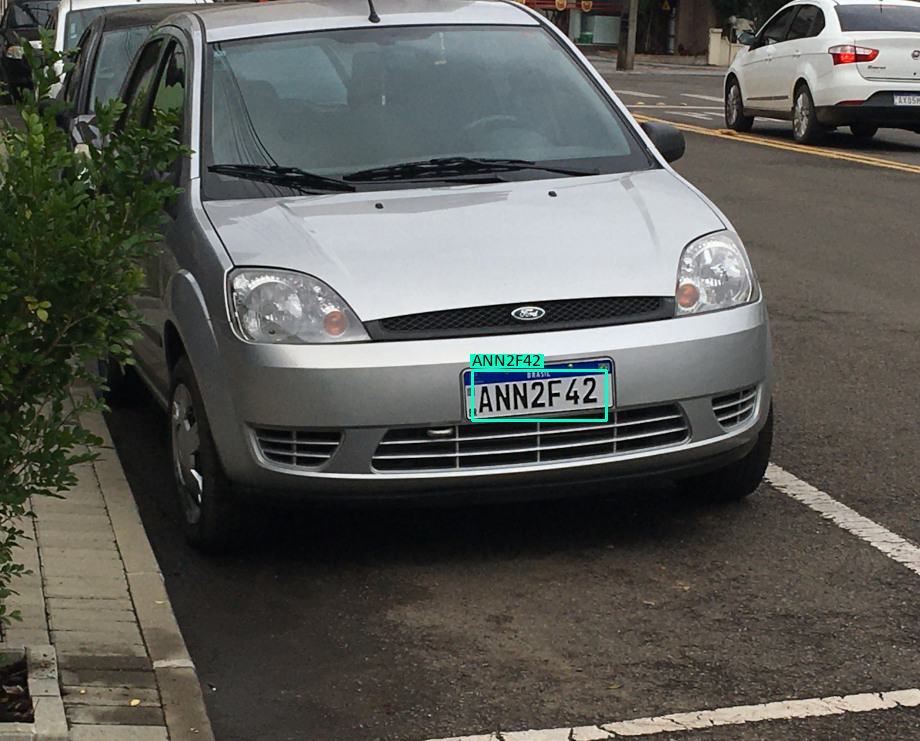

In [ ]:
img = cv2.imread('/content/imagens/img_carro01.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

cor_fonte = (0,0,0)
cor_fundo = (200,255,0)
cor_caixa = (200,255,0)
tamanho_fonte = 18

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd, cor_caixa)
  img = fundo_texto(texto, te[0], te[1], img, fonte, tamanho_fonte, cor_fundo)
  img = escreve_texto(texto, te[0], te[1], img, fonte, cor_fonte, tamanho_fonte)
cv2_imshow(img)